In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import pandas as pd

In [ ]:
pose_columns = list(["time", "type", "x", "y", "z"])

list_of_smoothed_path_df = list()

smoothed_path_df = pd.DataFrame(columns=pose_columns)
with open('/home/locomotion/latency_evaluations/pose_uncertainty_0.txt') as f:
    lines = f.readlines()
    first_time = float(lines[1].split()[0])
    print first_time
    
    for line in lines:    
        words = line.split()
        if words[0] == "NEW_SMOOTHED_PATH":
            print words[0]
            if not smoothed_path_df.empty:
                list_of_smoothed_path_df.append(smoothed_path_df)
            smoothed_path_df = pd.DataFrame(columns=pose_columns)
        else:
            for index,val in enumerate(words):
                words[index] = float(val)
            j = 1
            for i in range(4):
                if i == 0:
                    pose_type = "pose_smoothed"
                if i == 1:
                    pose_type = "pose_available"
                if i == 2:
                    pose_type = "pose_fp"
                if i == 3:
                    pose_type = "pose"
                smoothed_path_df_add = pd.DataFrame([[words[0]-first_time, pose_type, words[j], words[j+1], words[j+2]]], columns=pose_columns)
                smoothed_path_df = smoothed_path_df.append(smoothed_path_df_add, ignore_index=True)
                j = j + 3
            
        

1487624064.89
NEW_SMOOTHED_PATH
NEW_SMOOTHED_PATH
NEW_SMOOTHED_PATH
NEW_SMOOTHED_PATH
NEW_SMOOTHED_PATH
NEW_SMOOTHED_PATH
NEW_SMOOTHED_PATH


In [3]:
print len(list_of_smoothed_path_df)

16


time          15.9101
type    pose_smoothed
x         -0.00682325
y         0.000715581
z            0.126161
Name: 0, dtype: object


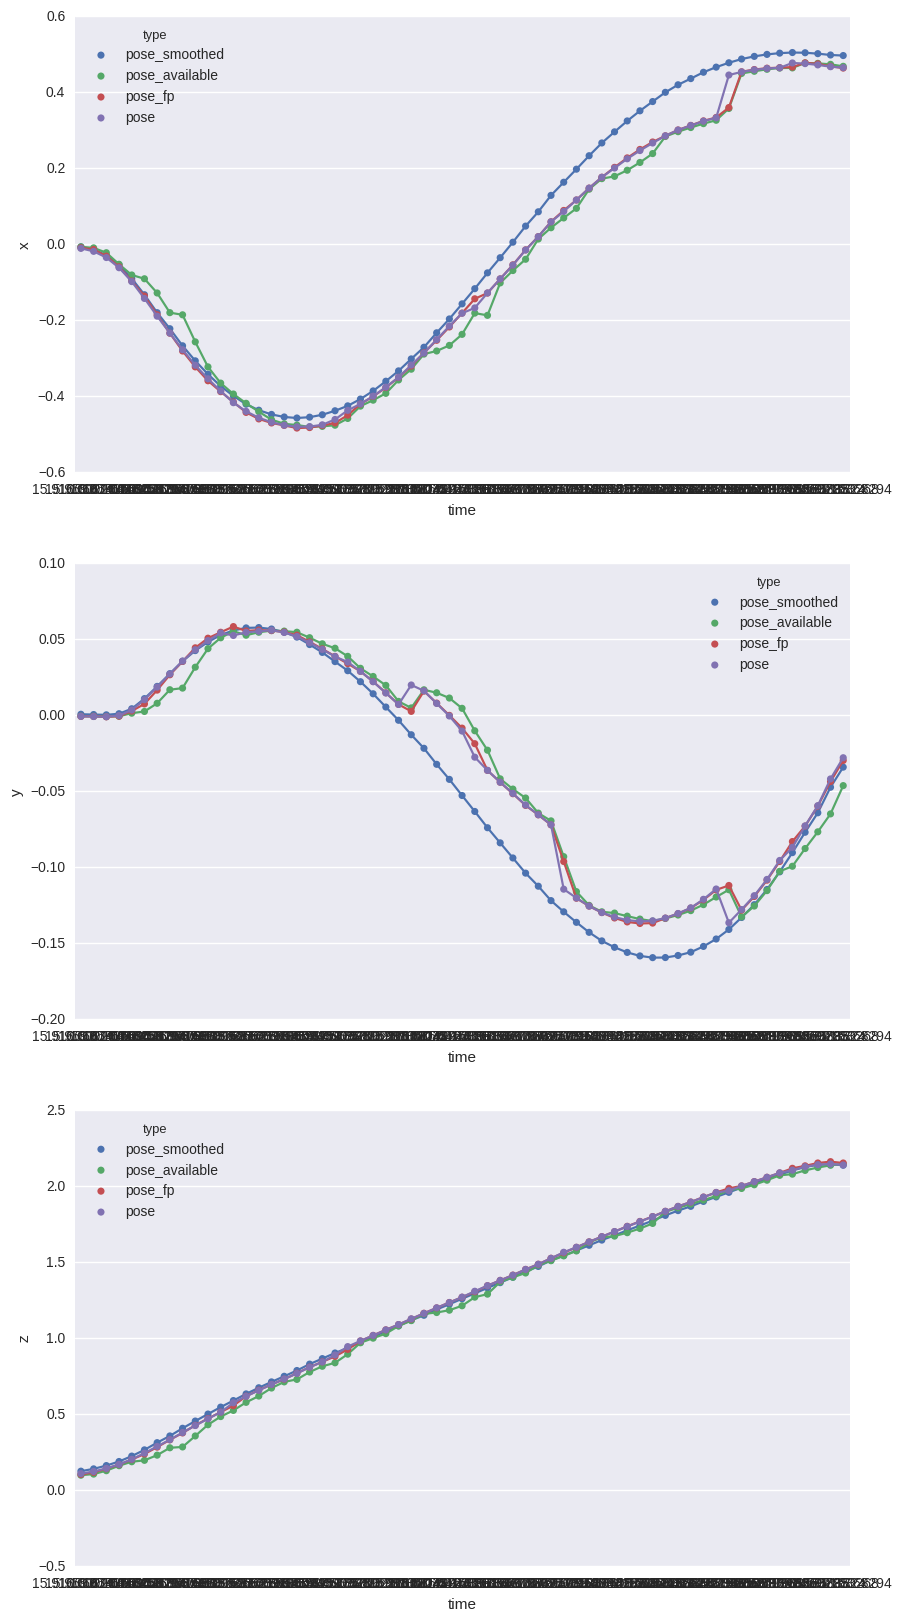

time          19.3112
type    pose_smoothed
x            0.635716
y            0.169331
z             1.78922
Name: 0, dtype: object


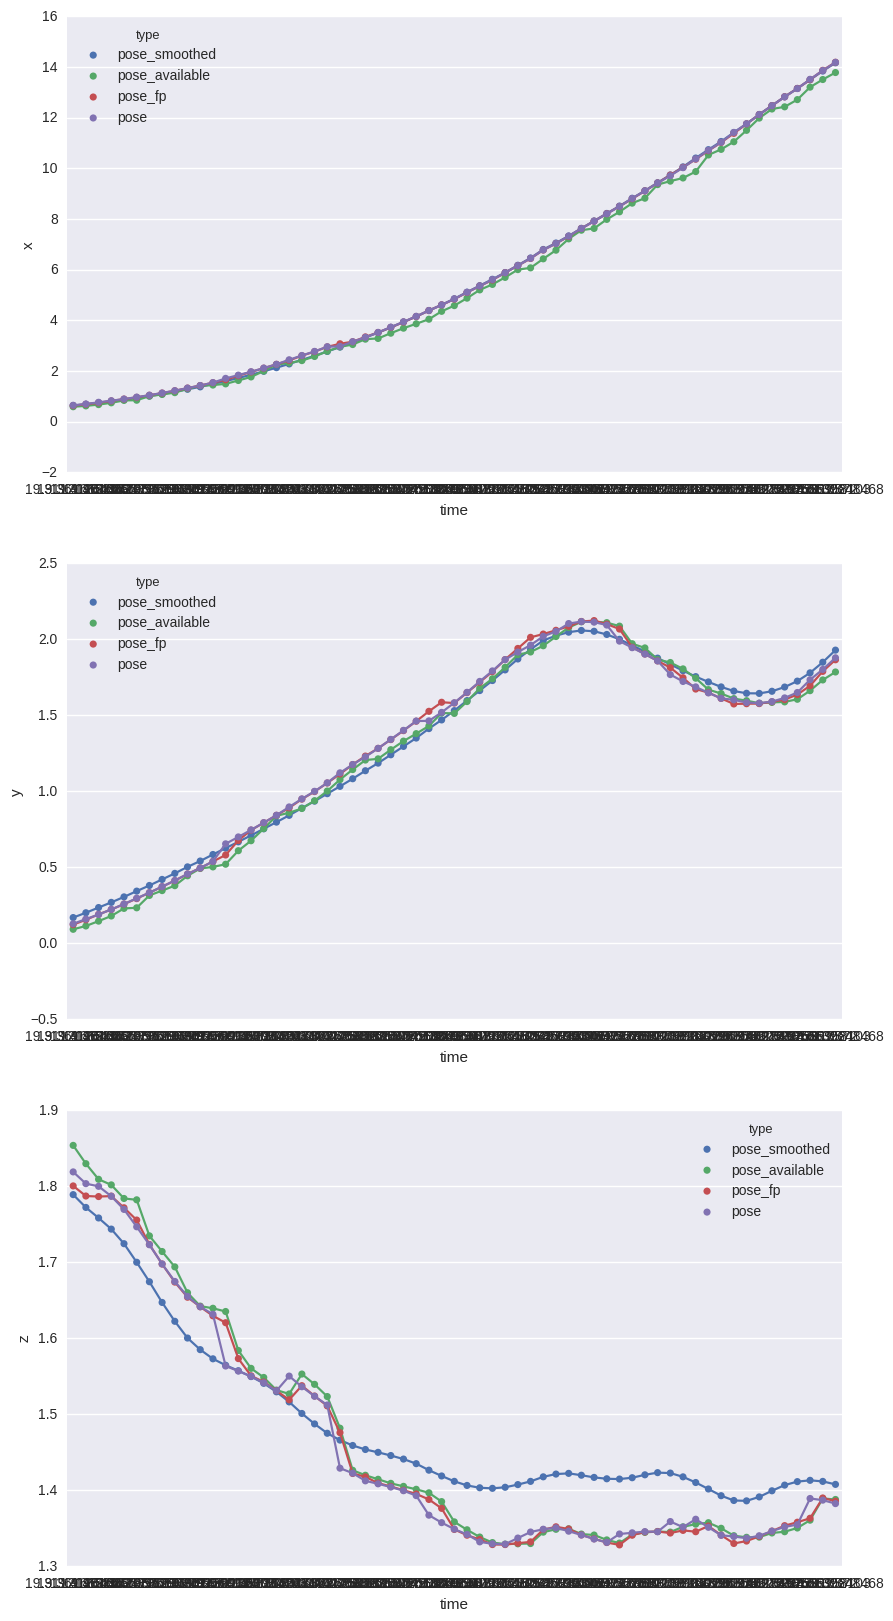

time          22.4636
type    pose_smoothed
x             14.9755
y             2.01345
z             1.64369
Name: 0, dtype: object


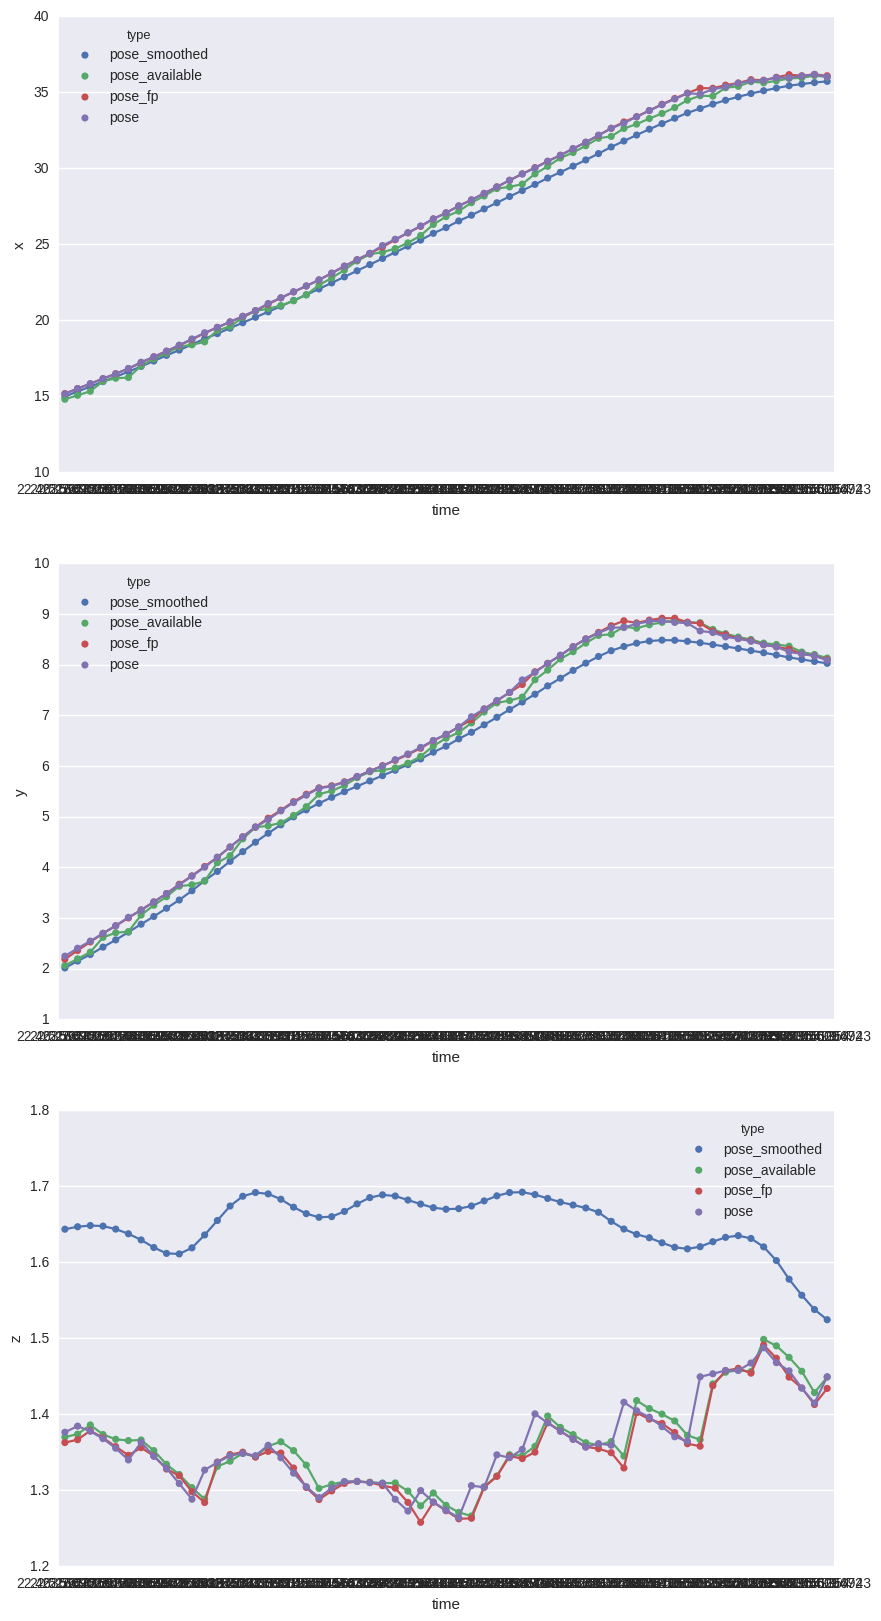

time           25.618
type    pose_smoothed
x             36.8093
y             8.10428
z             1.82536
Name: 0, dtype: object


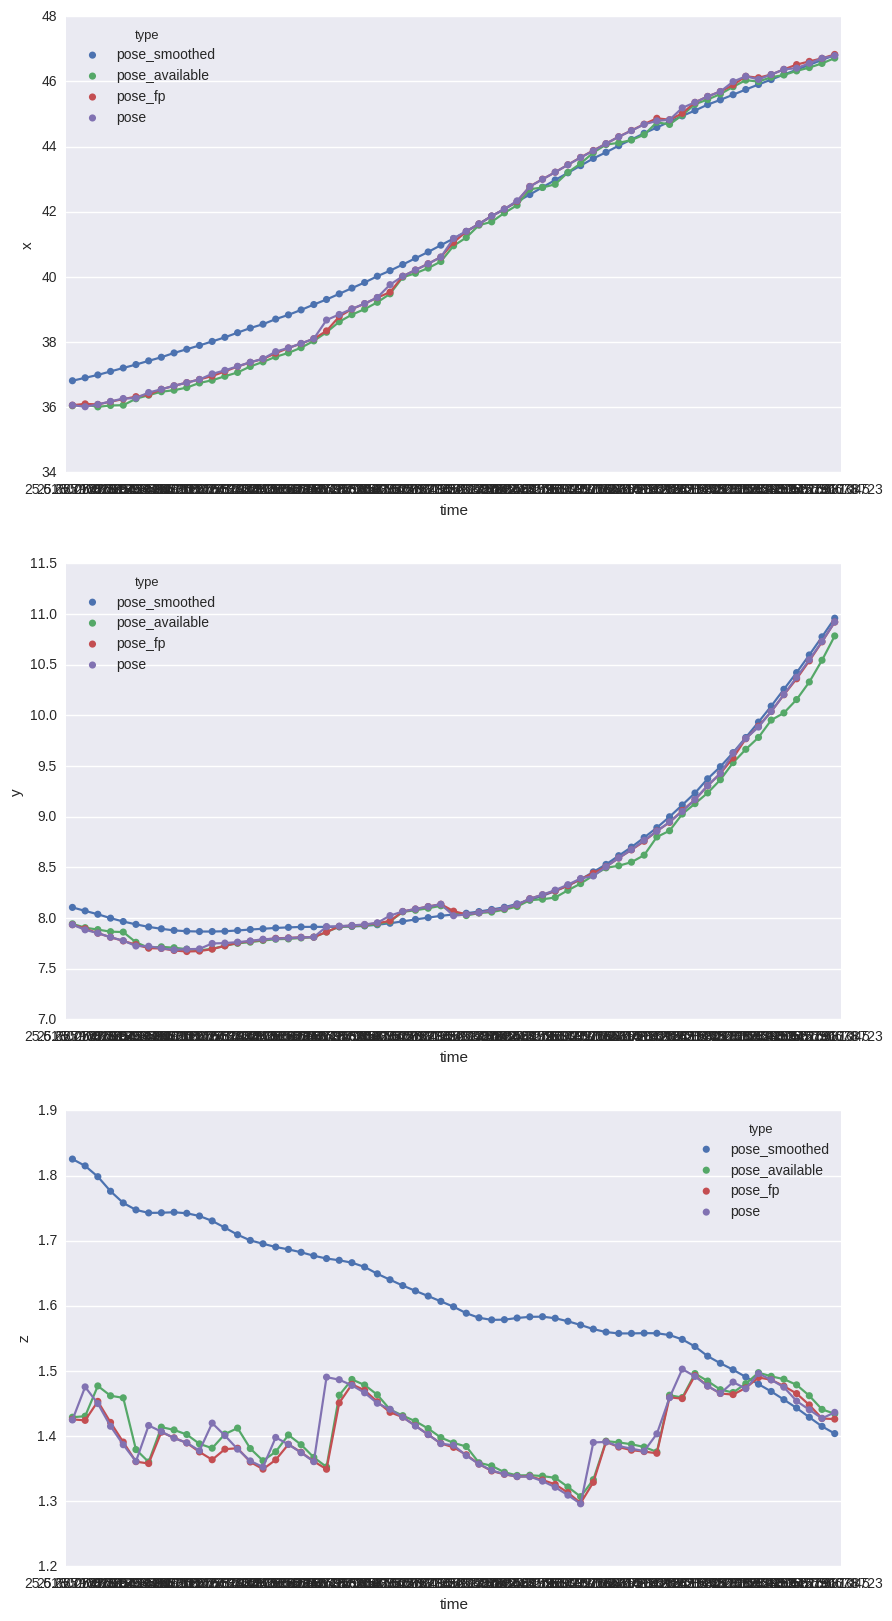

time          28.5173
type    pose_smoothed
x             46.6579
y             10.6082
z             1.42703
Name: 0, dtype: object


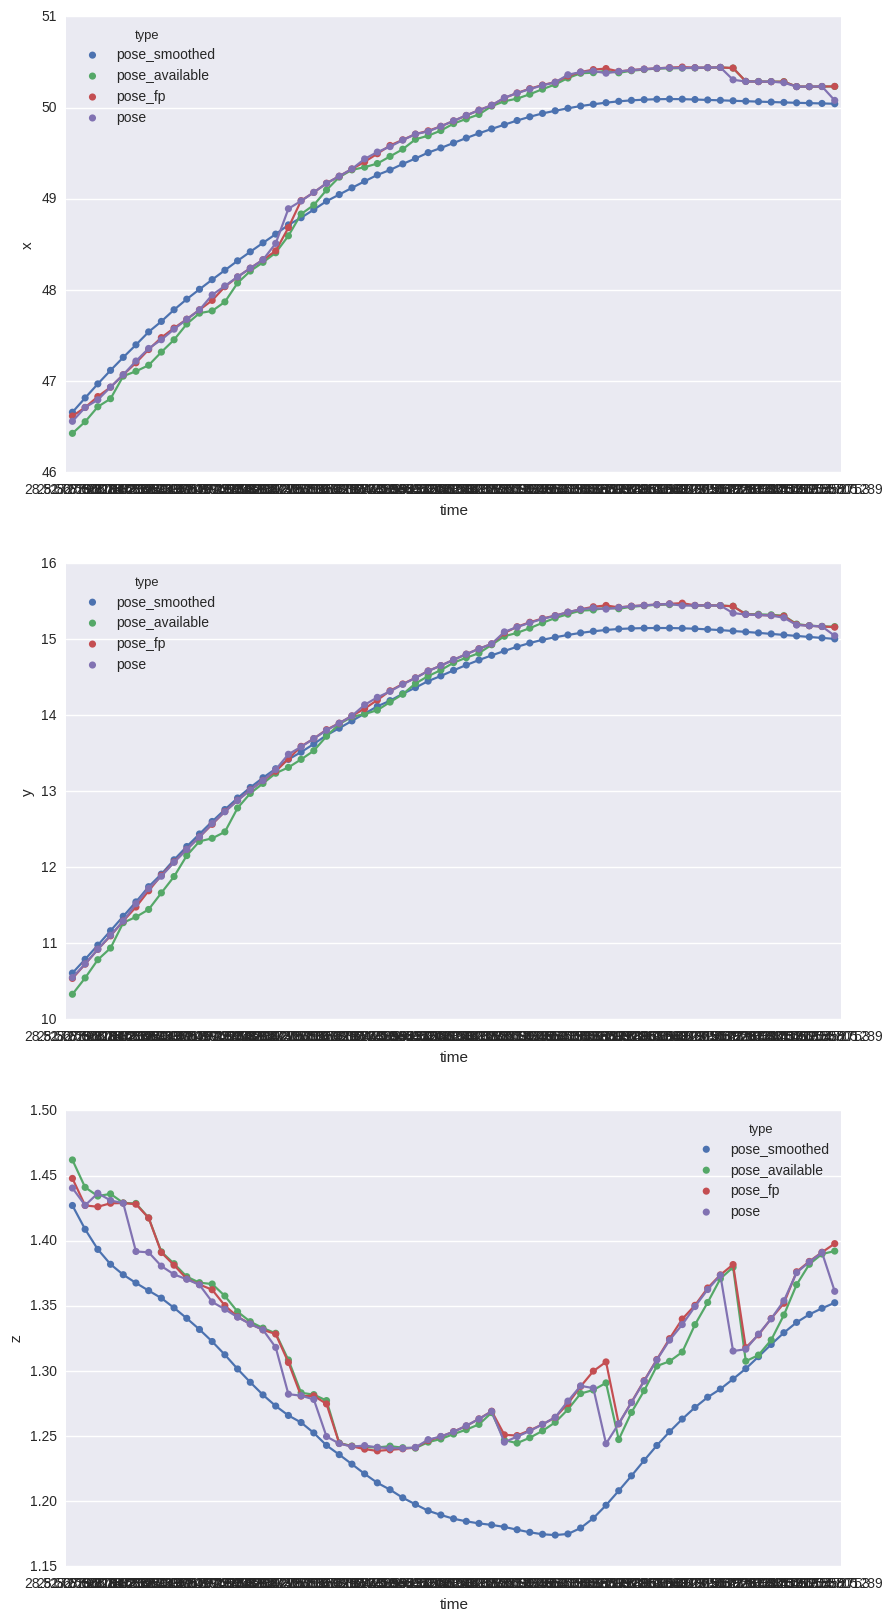

time          31.8196
type    pose_smoothed
x             49.9219
y             14.8052
z             1.43294
Name: 0, dtype: object


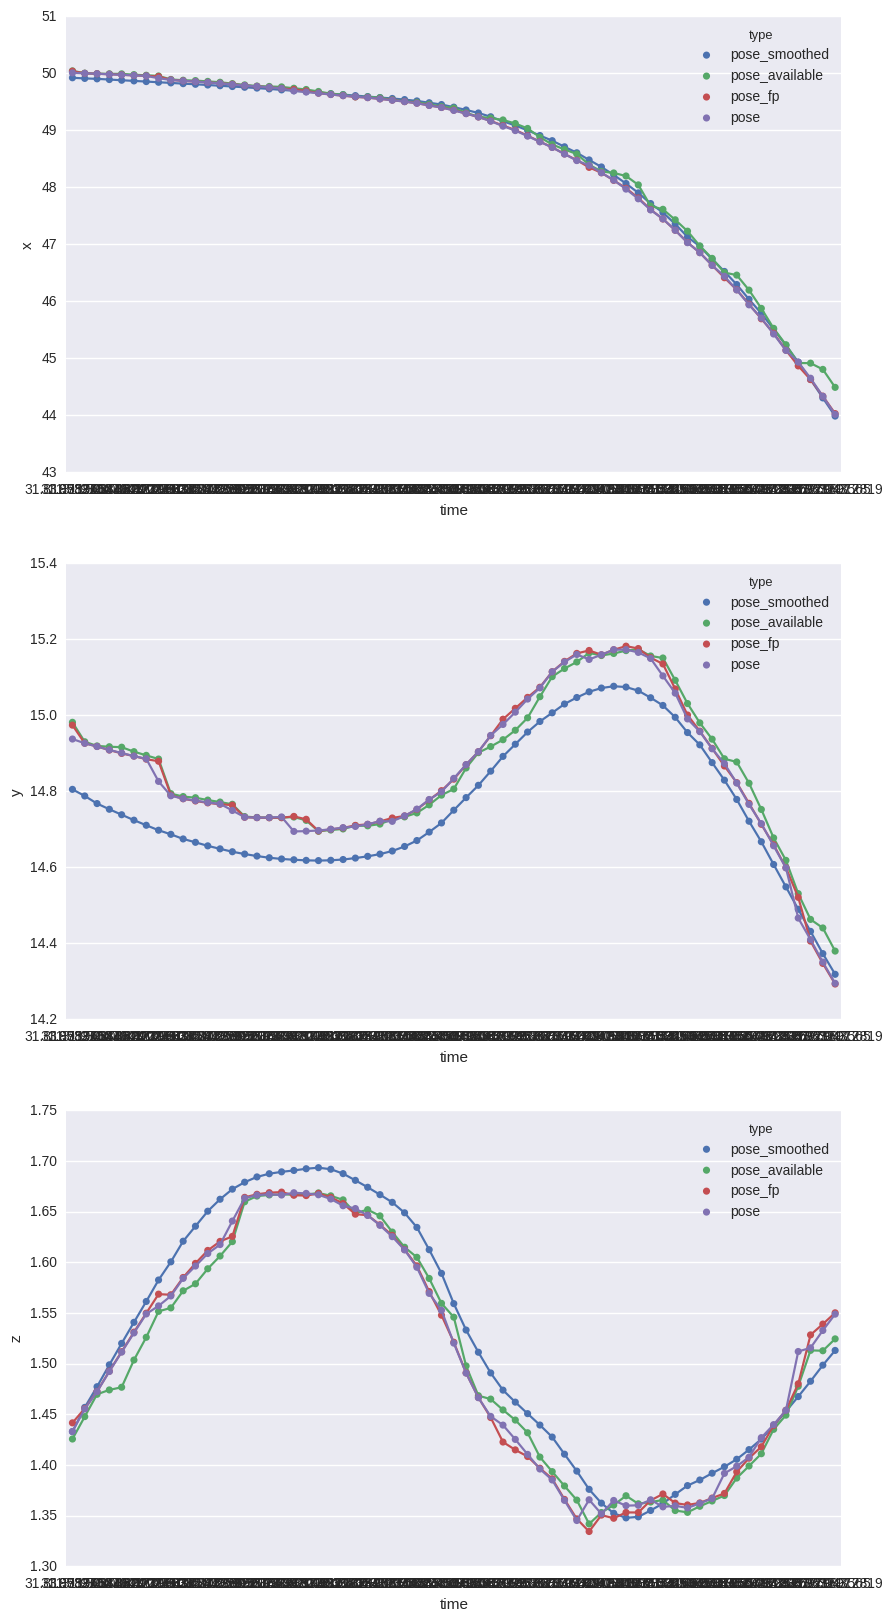

time          35.2241
type    pose_smoothed
x             41.8062
y             14.0529
z             1.54389
Name: 0, dtype: object


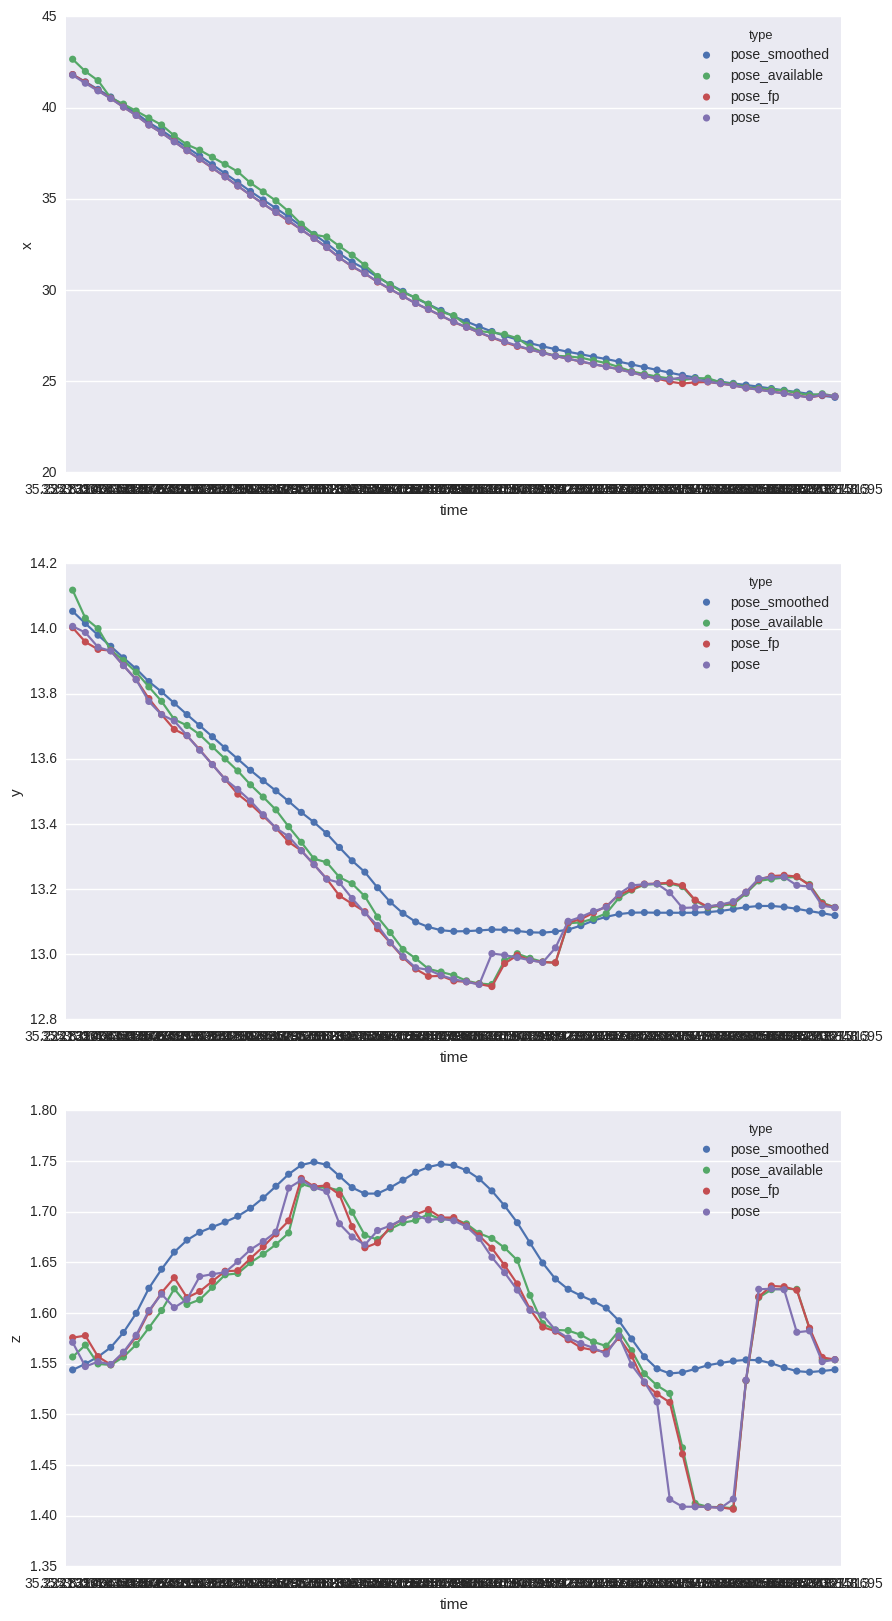

time          38.1242
type    pose_smoothed
x              24.731
y             13.0967
z               1.574
Name: 0, dtype: object


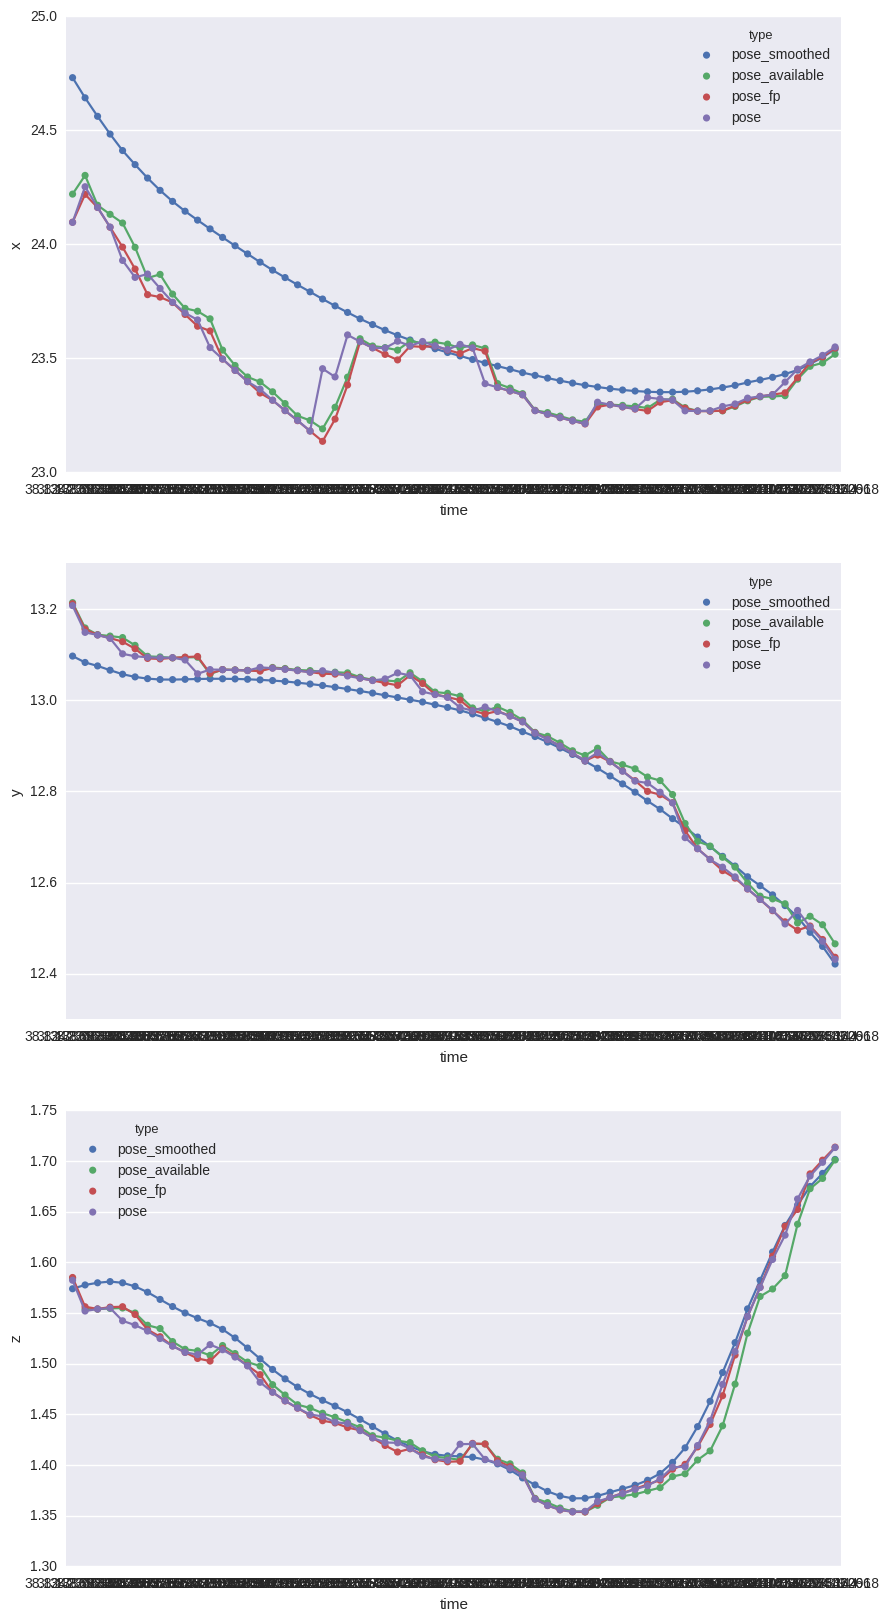

time           41.477
type    pose_smoothed
x             23.7088
y             12.0695
z             1.78514
Name: 0, dtype: object


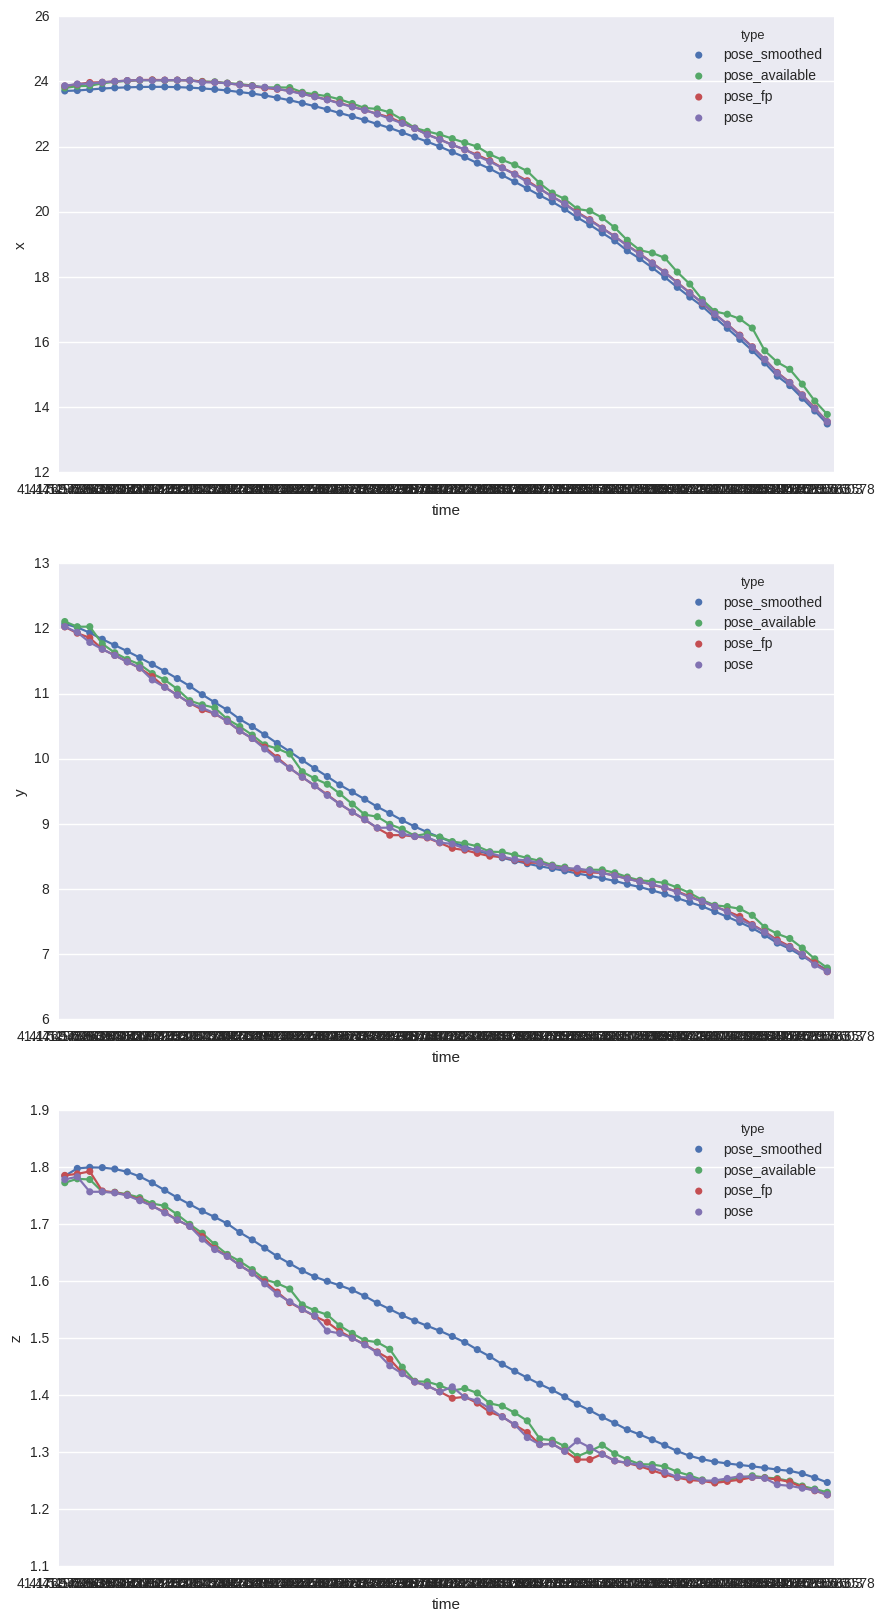

time          44.6778
type    pose_smoothed
x             12.6889
y             6.63044
z             1.53464
Name: 0, dtype: object


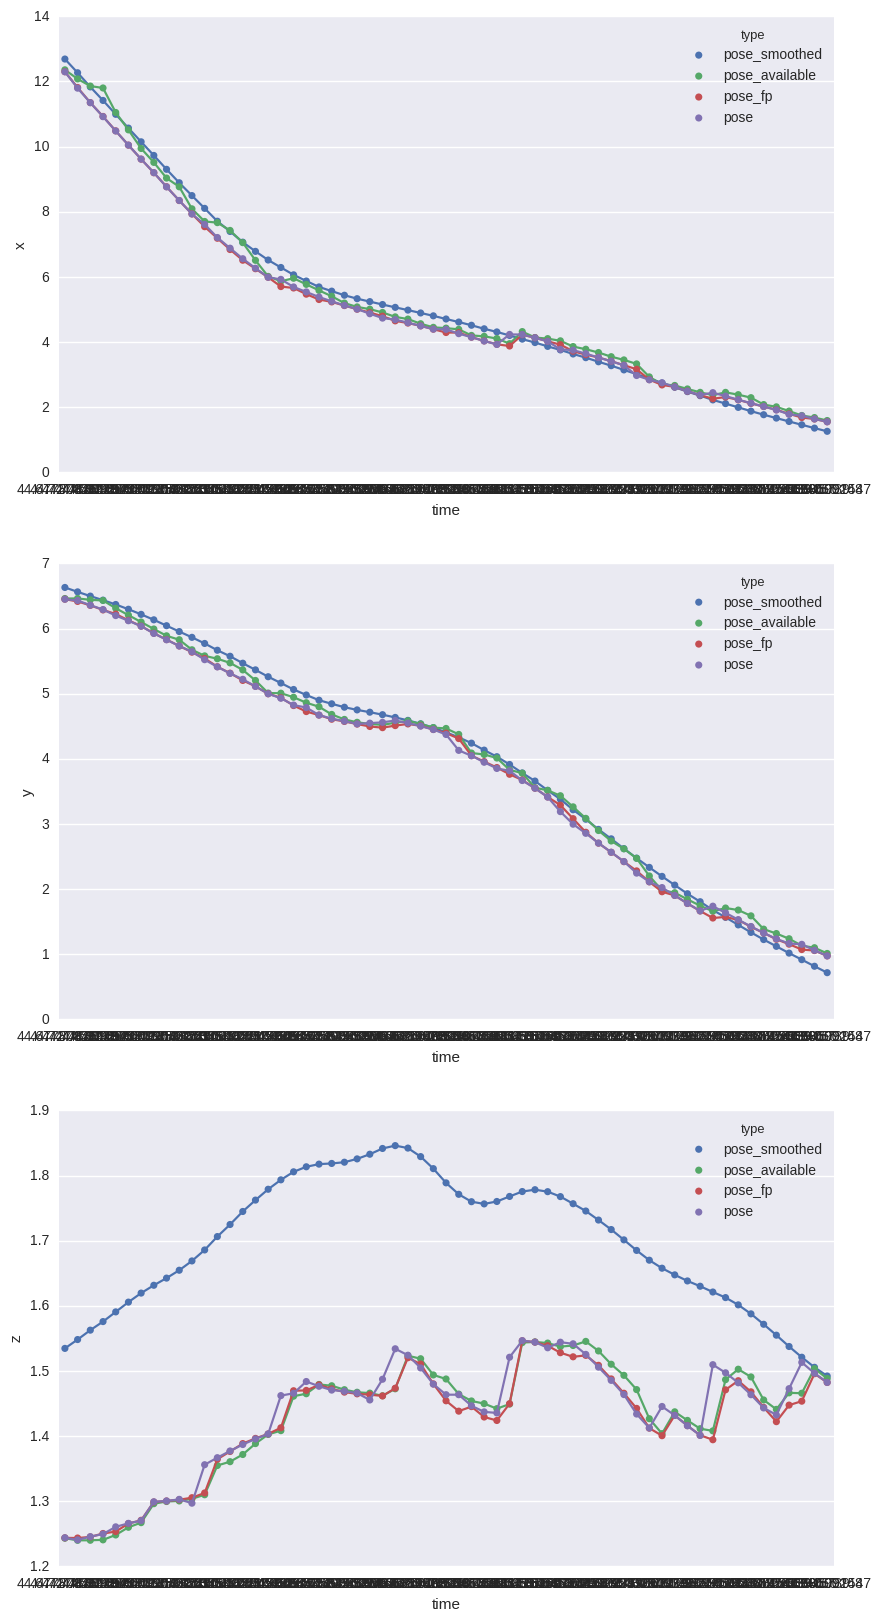

time          47.5295
type    pose_smoothed
x             2.07848
y             1.29112
z              1.7415
Name: 0, dtype: object


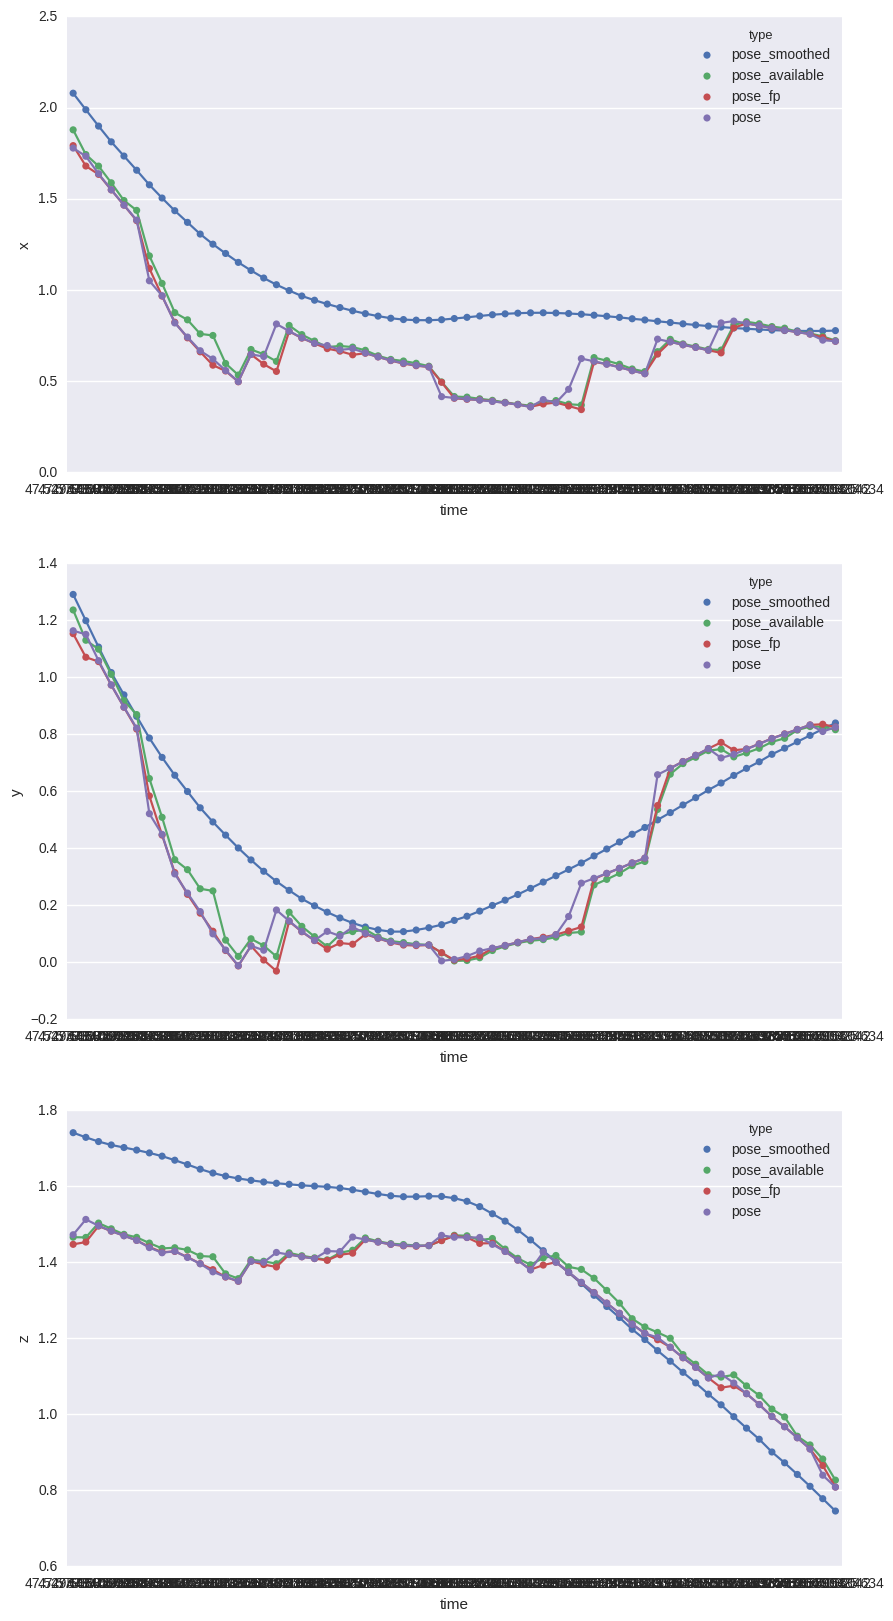

In [4]:
sns.set_style("darkgrid")

for index, value in enumerate(list_of_smoothed_path_df):
    if index < 5:
        continue # this is to not plot data sitting on ground
    print value.iloc[0]
    f, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10,20))
    ax1 = sns.pointplot(x="time", y="x", hue="type", data=value, ax=ax1, scale = 0.5)
    ax2 = sns.pointplot(x="time", y="y", hue="type", data=value, ax=ax2, scale = 0.5)
    ax3 = sns.pointplot(x="time", y="z", hue="type", data=value, ax=ax3, scale = 0.5)
    for ax in [ax1, ax2, ax3]:
        ax.set(xlabel='time')
    ax1.set(ylabel="x")
    ax2.set(ylabel="y")
    ax3.set(ylabel="z")
    plt.show()